In [1]:
import pandas as pd
from pandas import DataFrame
import numpy as np

import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
import sys

# Point this to folder that has information.py inside.
sys.path.append('/Users/joe/Sites/SFI/stats_nhood/statistics_neighborhoods')
from information import CensusFrame, information_calculations

# If you are making changes to information.py module
# %load_ext autoreload
# %autoreload 2

In [3]:
DATA_DIR = '/Users/joe/Dropbox/SFI_CensusData/UnitedStates/'
CENSUS_FILE = '2010acs_edu.csv' 

df = pd.read_csv(DATA_DIR + CENSUS_FILE, dtype={'ID':'str'})
df = df.set_index('ID', drop=False)

In [4]:
# Get columns you want to use as bins, use a regex of some sort
edu_regex = 'Edu_Level*'
edu_cols = df.filter(regex=edu_regex).columns

# Its helpful to add _bin to the column names to ensure you include only those
df = df.rename(columns={col:col + '_bin' for col in edu_cols})

In [19]:
# Set up the CensusFrame
#   data = the dataframe of the data
#   bin_regex = the regex that will match the bin columns
#   group_col = the column to group by (e.g. city id).
#   tot_col = the column to use as the total for each row. create this from bins, if necessary

bin_regex = 'Edu.*_bin$'

cf = CensusFrame(
        data=df,
        bin_regex=bin_regex,
        group_col='CITY_NAME',
        tot_col='TOTPOP',
    )

# Make sure you only have the bin columns you want
cf.filter(regex=bin_regex).columns

Index(['Edu_Level_0_bin', 'Edu_Level_1_bin', 'Edu_Level_2_bin',
       'Edu_Level_3_bin', 'Edu_Level_4_bin', 'Edu_Level_5_bin',
       'Edu_Level_6_bin', 'Edu_Level_7_bin', 'Edu_Level_8_bin',
       'Edu_Level_9_bin', 'Edu_Level_10_bin', 'Edu_Level_11_bin',
       'Edu_Level_12_bin', 'Edu_Level_13_bin', 'Edu_Level_14_bin',
       'Edu_Level_15_bin'],
      dtype='object')

In [7]:
# These functions run most of the calculations you will need

def run_information_calculations(censusframe, **kwargs):
    _ = censusframe.calculate_group_sums(**kwargs)
    _ = censusframe.nhood_weights()
    _ = censusframe.dkl_y()
    _ = censusframe.entropy_y()
    _ = censusframe.entropy_y(conditional=False)
    _ = censusframe.entropy_n()
    _ = censusframe.mutual_info()
    return

run_information_calculations(cf,
        var_regex = bin_regex, 
        var_list=['TOTPOP'])

In [16]:
# Now you can access either neighborhood or city level data with information theory values in the columns:

# cf.nhood_df (neighborhood level data)
# cf.city_df (city level data - the index is whatever you passed to group_col)
# e.g.:
cf.city_df.head()

,DKL(n|y)_Edu_Level_0_bin,DKL(n|y)_Edu_Level_10_bin,DKL(n|y)_Edu_Level_11_bin,DKL(n|y)_Edu_Level_12_bin,DKL(n|y)_Edu_Level_13_bin,DKL(n|y)_Edu_Level_14_bin,DKL(n|y)_Edu_Level_15_bin,DKL(n|y)_Edu_Level_1_bin,DKL(n|y)_Edu_Level_2_bin,DKL(n|y)_Edu_Level_3_bin,...,H(n|y)_Edu_Level_3_bin,H(n|y)_Edu_Level_4_bin,H(n|y)_Edu_Level_5_bin,H(n|y)_Edu_Level_6_bin,H(n|y)_Edu_Level_7_bin,H(n|y)_Edu_Level_8_bin,H(n|y)_Edu_Level_9_bin,H(y),TOTPOP,MI
CITY_NAME,,,,,,,,,,,,,,,,,,,,,
"Abbeville, LA Micro Area",1.037812,0.217105,0.564744,0.301556,0.973252,1.525835,2.771401,0.138149,1.213060,0.494106,...,4.927879,4.952261,4.745133,4.993620,4.562248,5.266463,4.926075,2.970333,57280,0.207153
"Aberdeen, SD Micro Area",2.606836,0.075037,0.095657,0.140041,0.464672,1.015468,2.154919,0.030405,2.802169,0.696954,...,4.429377,4.292800,3.751787,3.367319,3.538777,5.030396,4.923653,2.802520,40058,0.170816
"Aberdeen, WA Micro Area",1.695948,0.133783,0.179883,0.292184,0.677531,1.553511,2.329494,0.074598,1.970248,0.629900,...,5.162775,4.749903,5.254503,5.356209,5.191609,5.706772,5.650933,3.021013,72092,0.211551
"Abilene, TX Metro Area",1.995904,0.173822,0.433036,0.463082,0.824350,2.083184,2.348232,0.157157,1.754856,1.252149,...,5.794527,5.606002,5.708467,5.719960,6.007474,6.865055,6.779138,3.051275,163092,0.350779
"Ada, OK Micro Area",1.894614,0.073756,0.355089,0.181776,0.285433,1.089228,1.464415,0.056870,2.121542,0.766861,...,4.127014,3.932562,4.453291,4.298811,4.139683,4.774106,4.574255,3.002102,36644,0.212329


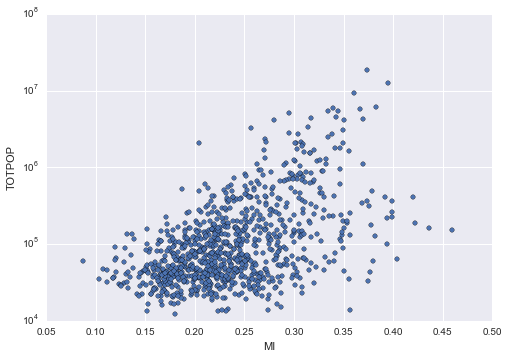

In [32]:
# Plot things like they are normal pandas dataframes (because they are)
cf.city_df.plot('MI', 'TOTPOP', kind='scatter', logy=True)

In [33]:
# Export Neighborhood dataframes to a csv
# cf.nhood_df.to_csv(DATA_DIR + 'USA_dkl_edu.csv')